<a href="https://colab.research.google.com/github/shivashukla02/World-Bank-Global-Edu-Analysis/blob/main/SHIVANK_World_Bank_Global_Edu_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

#**In this project we are going to analyze the World Bank EdStats Data in order to find out valuable insights.**

In [1]:
# Importing all the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from google.colab import drive

In [2]:
# Now we are importing the drive for mounting.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading all the csv files.
path1=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsCountry.csv')
path3=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsData.csv')
path4=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsSeries.csv')


In [4]:
country_df=pd.read_csv(path2)
main_data=pd.read_csv(path3)
new_data=pd.read_csv(path3)


***Acquiring the Overview of data***

---


---







In [5]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [6]:
# From columns of Main Data dropping the NULL values.
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)

main_data.drop(['Country Code'],axis=1,inplace=True)


In [7]:
main_data.set_index(['Country Name'],inplace=True)

In [8]:
# Setting up two Data Frames.
Income_df=main_data.loc[['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income']]

In [9]:
Region_df=main_data.loc[['World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

**POPULATION GROWTH DATA**

---



In [10]:
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']

In [11]:
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
graph_1=population_growth.transpose()

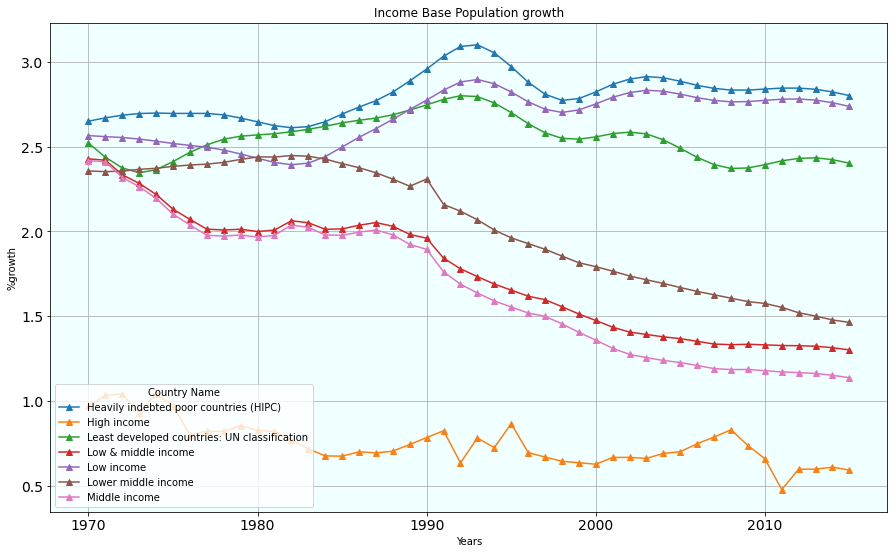

In [13]:
plt.rcParams['figure.figsize']=(15,5)
graph_1.plot( kind="line",xlabel = "Years" , ylabel = "%growth",
               title="Income Base Population growth",   
               fontsize = 14,figsize=(15,9),
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

**ANALYSIS FOR GIRLS EDUCATION**

---



In [14]:
girl_eduction_income=Income_df.copy()

In [15]:
girl_education_income_notnull=girl_eduction_income.loc[:,['Indicator Code','2010','2011','2012','2013','2014','2015']].dropna()

In [16]:
girl_education_income_primary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.PRE.ENRL.FE']

In [17]:
girl_education_income_primary.drop(['Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
graph_2a=girl_education_income_primary.transpose()

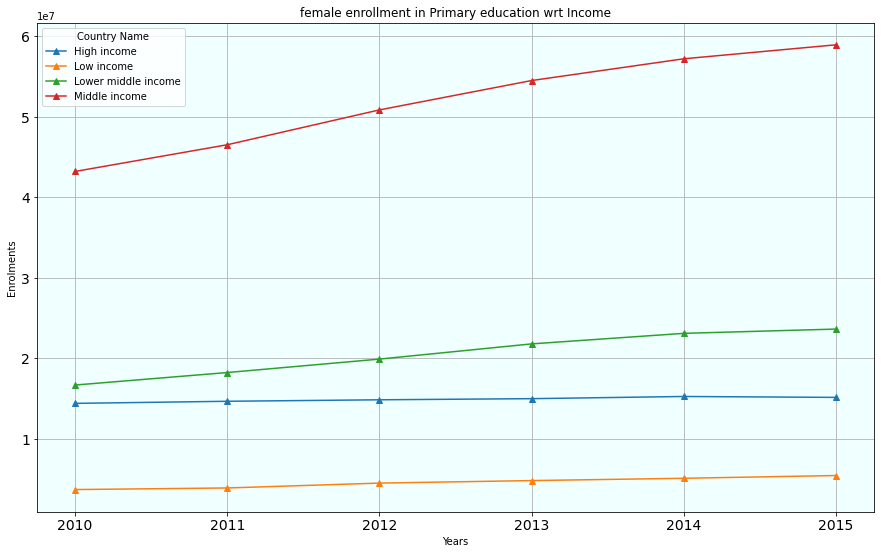

In [19]:
plt.rcParams['figure.figsize']=(10,5)
graph_2a.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
               title="female enrollment in Primary education wrt Income",   
               figsize=(15,9), fontsize = 14,
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

In [20]:
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.SEC.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2b=girl_education_income_secondry.transpose()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


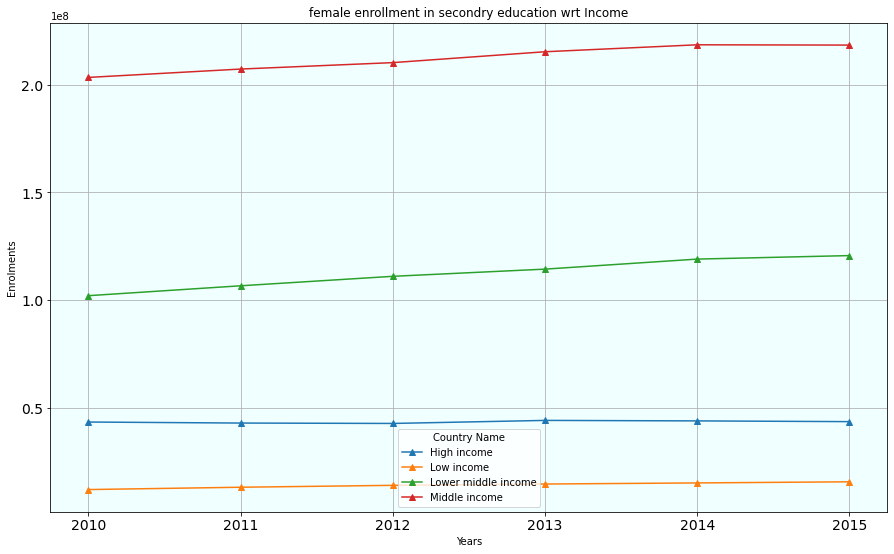

In [21]:
plt.rcParams['figure.figsize']=(10,5)
graph_2b.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
               title="female enrollment in secondry education wrt Income",   
               figsize=(15,9), fontsize = 14,
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

In [22]:
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.TER.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2c=girl_education_income_secondry.transpose()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


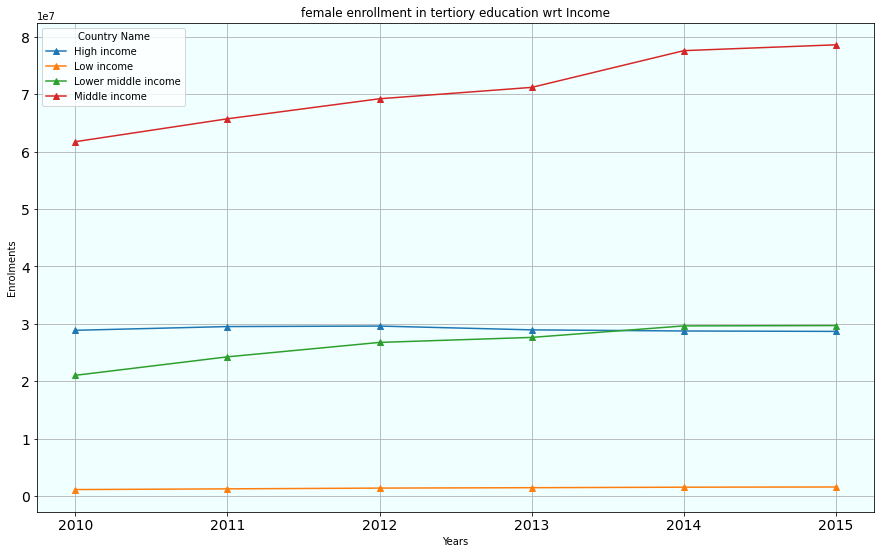

In [23]:
plt.rcParams['figure.figsize']=(10,5)
graph_2c.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
               title="female enrollment in tertiory education wrt Income",   
               figsize=(15,9), fontsize = 14,
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

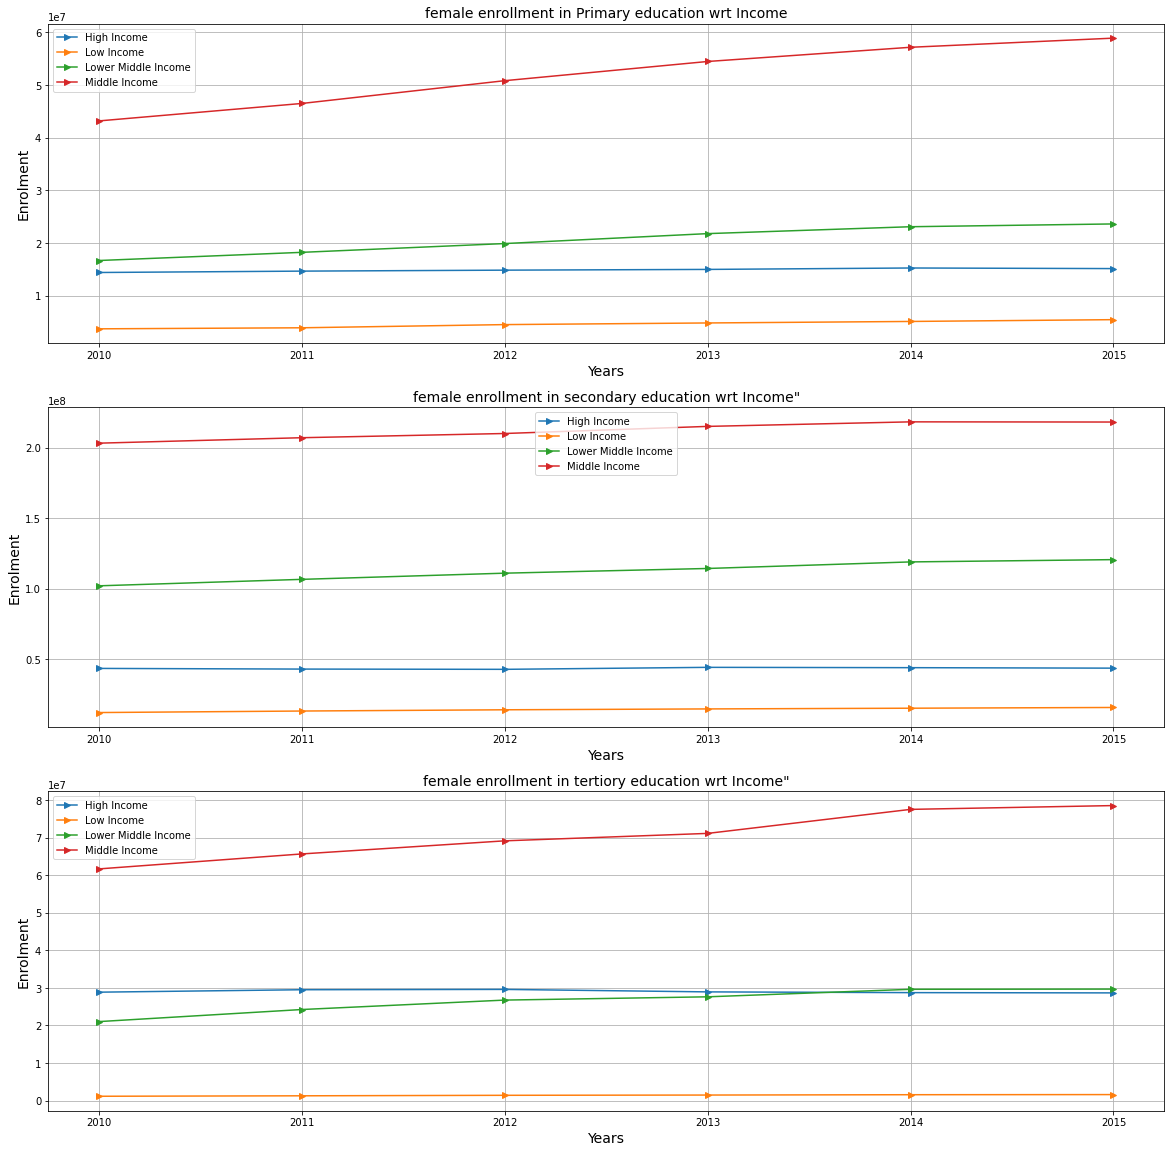

In [57]:
# Subplotting the chart of all three female enrollment wrt income.
plt.subplot(3,1,1)
plt.plot(graph_2a, marker = ">")
plt.rcParams['figure.figsize']=(20,20)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in Primary education wrt Income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(graph_2b, marker = ">")
plt.rcParams['figure.figsize']=(20,20)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in secondary education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(graph_2c,marker = ">")
plt.rcParams['figure.figsize']=(20,20)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in tertiory education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.show()

# Above function will create and display the graph after successful execution.  
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# marker:- used to show a trend or mark an important value.  

No. of countries lies in which income group

In [25]:
Countries_incomegroup=country_df[['Income Group','Short Name']].groupby(country_df[['Income Group','Short Name']]['Income Group']).agg({'Short Name':'count'})
Countries_incomegroup.rename(columns = {'Income Group':'new_col1', 'Short Name':'new_col2'}, inplace = True)
Countries_incomegroup

,new_col2
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


In [26]:
path_2 ='/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsCountry.csv'

df_country = pd.read_csv(path2)


In [27]:
allocation = []
for i in df_country['Income Group']:
  if i == "High income: nonOECD" or i == "High income: OECD":
    allocation.append(4)
  elif i == 'Upper middle income':
    allocation.append(3)
  elif i == 'Lower middle income':
    allocation.append(2)
  elif i == 'Low income':
    allocation.append(1)
  else:
    allocation.append(0)
df_country["allocation"] = allocation

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = df_country['Country Code'],
    z = df_country["allocation"],
    text = df_country['Short Name'],
    colorscale = 'teal',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Economy<br>Class ',
))
fig.update_layout(
    title_text='World Economy Class',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = 'Low Income = 1, Lower Middle Income = 2, Upper Middle Income = 3, High income = 4 ',
        showarrow = False
    )]
)

fig.show()

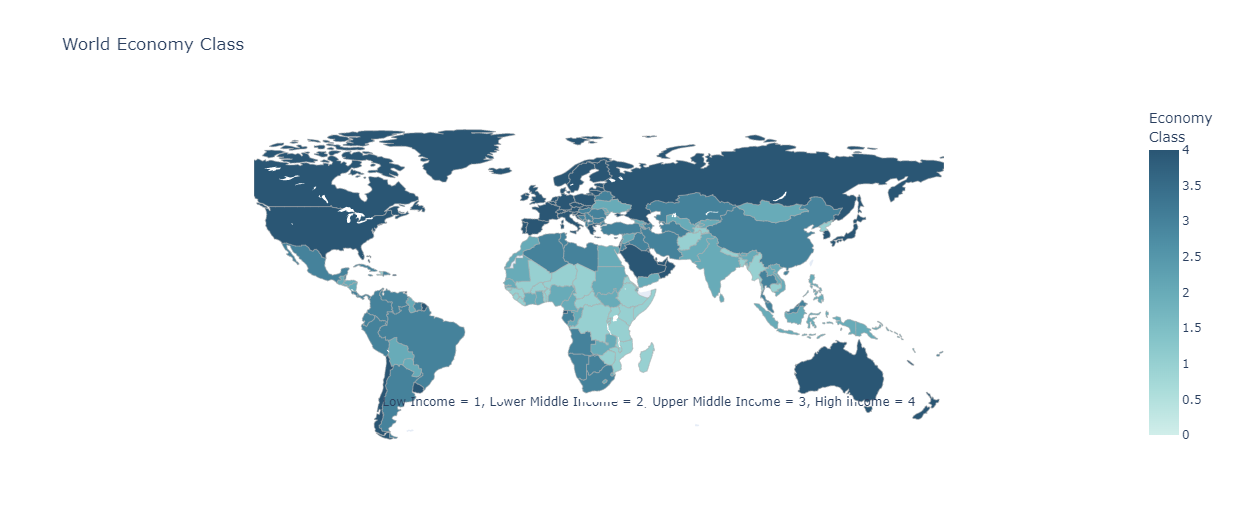

**Countries lies in which Income group**

---



In [29]:
Income = ['High income: OECD','High income: nonOECD','Low income','Lower middle income','Upper middle income']

data = [31,44,34,50,55]

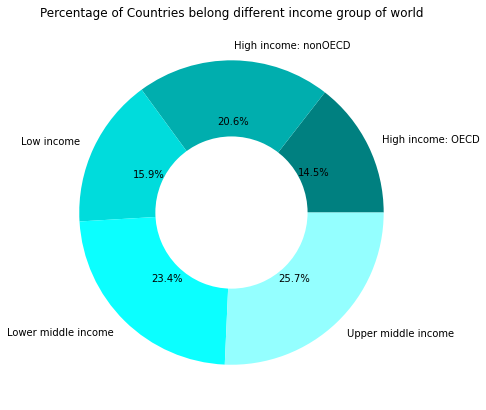

In [30]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Income,autopct='%0.1f%%',radius=1,colors=['#008080','#00AEAE','#00DCDC','#0BFFFF','#94FFFF','#175873'])
plt.pie([100],colors=['w'],radius=0.5)
plt.title('Percentage of Countries belong different income group of world')
 
# show plot
plt.show()

percentage share of gdp

In [31]:
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_Share.loc[['High income', 'Middle income', 'Low income', 'Lower middle income',],['2015']]
name = ['High income', 'Middle income', 'Low income', 'Lower middle income',]
quantity=[4.757751e+13,2.679605e+13,4.023901e+11,6.017050e+12]

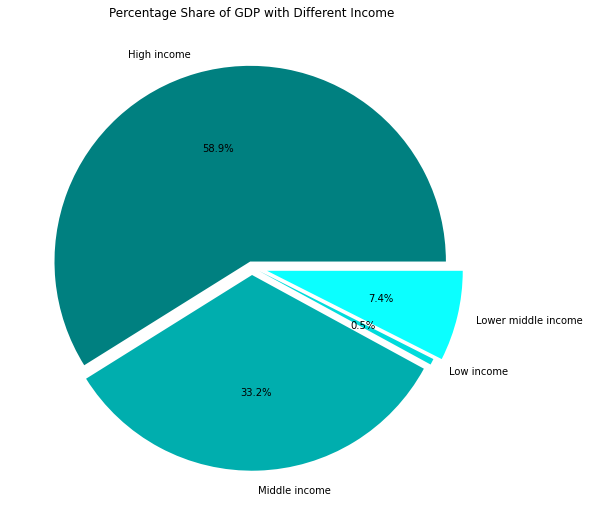

In [32]:

fig = plt.figure(figsize =(15,9))
plt.pie(quantity,labels=name,autopct='%0.1f%%', explode = [0.03,0.04,0.04,0.08],colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF','#94FFFF'])
plt.title('Percentage Share of GDP with Different Income')
plt.show()

kid not getting primary level entry in school

In [33]:
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.UNER']
graph_4a=no_primary_enrollment.transpose()
graph_4a.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4a.dropna(inplace=True)

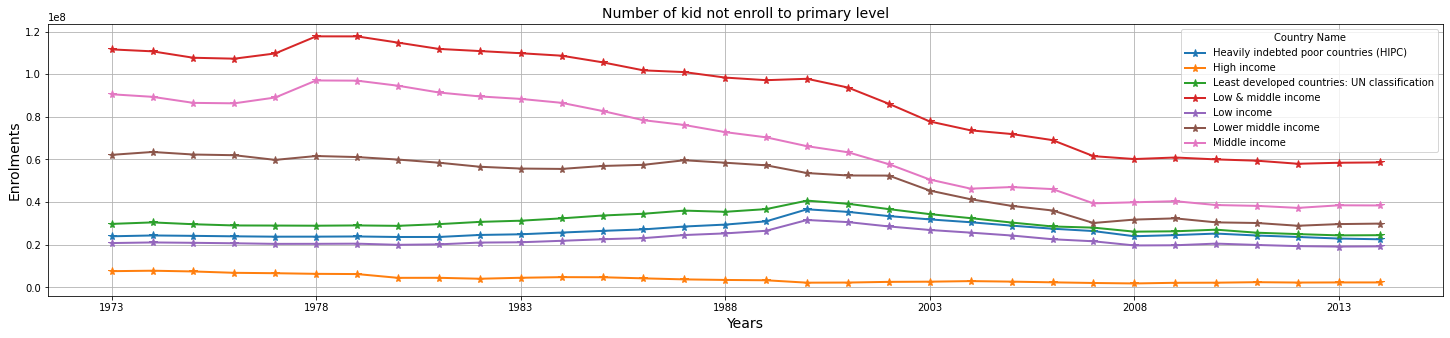

In [34]:
plt.rcParams['figure.figsize']=(25,5)
graph_4a.plot(linewidth=2,
    linestyle='-',
    marker='*',markersize=8)
plt.title('Number of kid not enroll to primary level',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolments',fontsize=14)
plt.grid(True)

plt.show()


pupil to teacher ratio in primary education and secondary education

In [35]:
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']
graph_4b=no_primary_enrollment.transpose()
graph_4b.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4b.dropna(inplace=True)


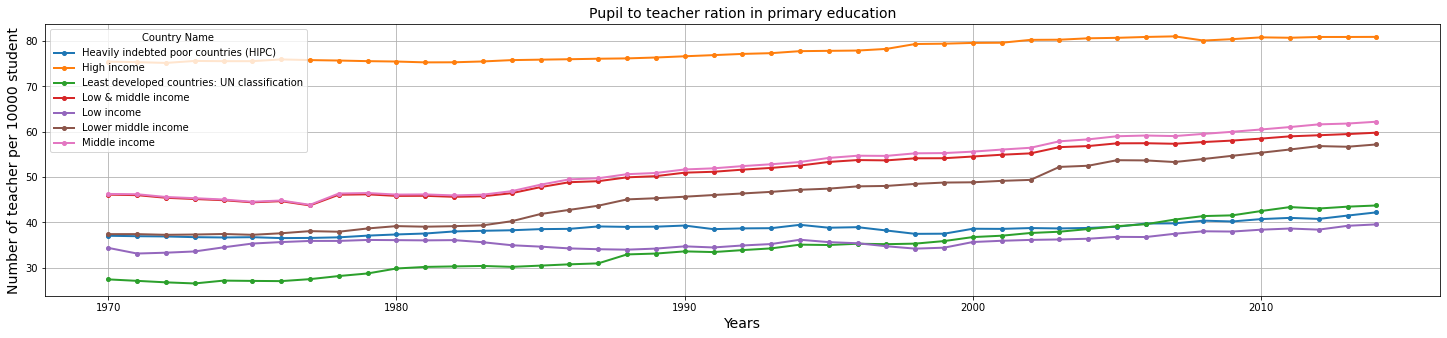

In [36]:
plt.rcParams['figure.figsize']=(25,5)
graph_4b.plot(linewidth=2,
    linestyle='-',
    marker='o',markersize=4,grid=True)
plt.title('Pupil to teacher ration in primary education',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of teacher per 10000 student',fontsize=14)
plt.show()

#DATA FOR WORLD AND BIG ECONOMIES#

---






In [37]:
clean_data=new_data[['Country Name','Indicator Code','2015']] #Data cleaning

In [38]:
Sorted=clean_data[clean_data['Indicator Code']=='SL.TLF.TOTL.IN'].set_index(['Country Name'])

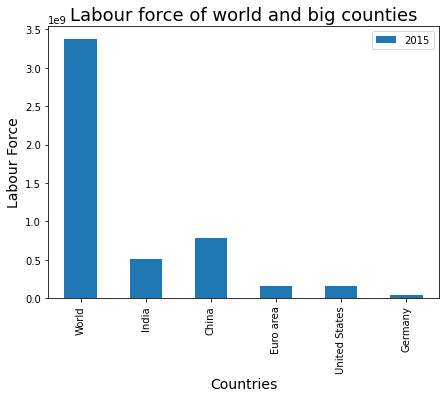

In [39]:
Sorted1=Sorted.copy()
Sorted1.drop("Indicator Code",axis=1,inplace=True)
GraphX=Sorted1.loc[['World','India','China','Euro area','United States','Germany']]
plt.rcParams['figure.figsize']=(7,5)
GraphX.plot(kind='bar')
plt.title('Labour force of world and big counties',fontsize=18)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Labour Force',fontsize=14)
plt.show()

In [40]:
nn=pd.read_csv(path3)# World,China,India,United States,Germany,Euro area
nn.set_index('Indicator Code',inplace=True)
nn2=nn.loc[['SE.ADT.1524.LT.ZS','NY.GDP.PCAP.CD','SL.UEM.TOTL.ZS','SL.TLF.TOTL.IN'],['Country Name','2010']]

In [41]:
World={'GDP percapita':[9.516347e+03,4.560513e+03,1.345770e+03,4.837388e+04,4.178556e+04,3.761772e+04],'total unemployment':[6.081802e+00,4.200000e+00,3.600000e+00,4.837388e+04,7.000000e+00,1.013016e+01],'total illiterate workforce':[3.181296e+09,7.799515e+08,4.706091e+08,1.570211e+08,4.201639e+07,1.614402e+08]}

In [42]:
cor=pd.DataFrame(World,index=['World','China','India','United States','Germany','Euro area'])
cor

,GDP percapita,total unemployment,total illiterate workforce
World,9516.347,6.081802,3.181296e+09
China,4560.513,4.200000,7.799515e+08
India,1345.770,3.600000,4.706091e+08
United States,48373.880,48373.880000,1.570211e+08
Germany,41785.560,7.000000,4.201639e+07
Euro area,37617.720,10.130160,1.614402e+08


In [43]:
final_cor=cor.corr()
final_cor

,GDP percapita,total unemployment,total illiterate workforce
GDP percapita,1.000000,0.572886,-0.513668
total unemployment,0.572886,1.000000,-0.262447
total illiterate workforce,-0.513668,-0.262447,1.000000


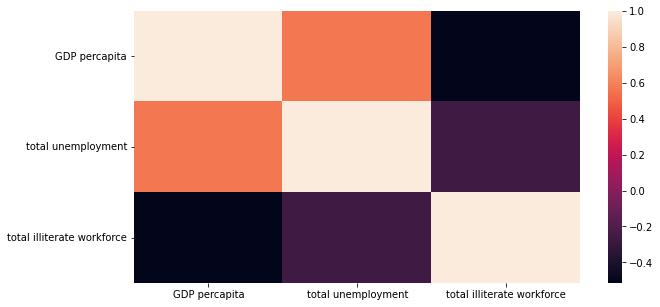

In [44]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(final_cor)                       

In [45]:
exp1_1=pd.read_csv(path3)
exp1_1.set_index('Indicator Code',inplace=True)
exp2_1=exp1_1.loc[['SE.XPD.TOTL.GD.ZS'],['Country Name','Country Code','1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010']]
exp2_1.set_index('Country Name',inplace=True)
exp3_1=exp2_1.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
exp3_1.drop('Country Code',axis=1,inplace=True)
exp4_1=exp3_1.transpose()

In [46]:
exp4_1

Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,...,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51408,2.23619,6.13795,4.21217,2.62048,4.42809,4.09449,6.75508,4.71968,3.68879,...,4.11247,5.87260,4.27280,6.92362,4.89592,2.07659,4.83249,4.18744,6.27099,4.06374
2000,4.58360,2.77633,5.60472,3.85399,2.88743,3.50333,3.70380,7.70486,4.89278,3.66536,...,3.87199,5.44197,4.17798,6.81987,4.78606,2.32863,5.25327,4.51075,6.20198,4.10980
2001,4.82829,2.46081,5.58878,3.50342,3.24010,3.70624,3.67073,8.35785,5.03351,3.76072,...,3.94199,5.16125,4.11710,6.68097,4.96211,2.37658,4.81336,4.18628,6.20183,4.17893
2002,4.01195,2.13892,5.54010,3.15449,2.94995,4.27376,4.08827,9.57120,5.48652,3.98989,...,4.25106,5.04762,4.13762,7.00070,5.32322,2.77580,3.86464,4.00874,5.79003,4.71955
2003,3.53420,2.15119,5.38185,3.28615,3.12000,4.33062,3.96629,9.94078,6.65670,4.15177,...,4.21721,4.85395,4.16962,6.85111,5.53856,2.42263,3.72402,4.19424,6.81673,4.88927
2004,3.48735,2.48406,5.31006,3.44766,3.50598,4.07620,4.12571,10.26828,6.08196,4.01744,...,4.10813,5.05277,4.15031,6.71100,5.45846,2.77208,4.03337,3.63333,6.72078,4.80557
2005,3.84376,2.71551,5.27167,2.97462,3.63625,3.99684,4.10655,10.55769,6.19600,3.89627,...,3.76522,5.05164,4.12810,6.55354,5.22361,3.51215,3.94087,3.39375,6.45157,5.01561
2006,4.11043,2.71188,5.26237,2.55551,3.50185,3.89228,4.00060,9.05729,6.22760,4.22046,...,3.71354,5.07026,4.15923,6.40877,4.98269,3.40348,4.05069,3.66957,6.43859,5.04410
2007,4.44269,3.01825,5.18300,2.54928,3.23094,4.05938,4.25834,11.86829,6.25248,3.87684,...,3.52932,4.97252,4.23648,6.20952,4.71263,3.41328,3.60168,3.69752,6.46552,4.96506
2008,4.84291,3.17115,5.29572,2.44093,3.80054,3.91051,4.36058,14.05908,6.72402,3.74839,...,3.52674,4.86486,4.48577,6.38620,4.89597,3.45983,3.50739,3.42958,6.27219,4.95671


In [47]:
cm = sns.light_palette("Blue", as_cmap=True)
exp4_1.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Finland,France,"Gambia, The",Hungary,Iceland,"Iran, Islamic Rep.",Ireland,Israel,Italy,Kyrgyz Republic,"Macao SAR, China",Mauritius,Mexico,Moldova,Nepal,Netherlands,Norway,Peru,Poland,Portugal,Qatar,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51,2.24,6.14,4.21,2.62,4.43,4.09,6.76,4.72,3.69,7.94,5.87,5.64,1.57,4.58,6.47,4.22,4.14,6.42,4.53,4.09,3.69,3.94,3.66,4.66,2.89,4.56,6.94,3.44,4.60,5.03,4.35,4.11,5.87,4.27,6.92,4.90,2.08,4.83,4.19,6.27,4.06
2000,4.58,2.78,5.60,3.85,2.89,3.50,3.70,7.70,4.89,3.67,8.07,5.73,5.50,1.47,4.88,6.50,4.03,4.15,6.11,4.30,3.51,3.68,3.82,4.14,4.49,2.98,4.63,6.46,3.22,4.99,5.18,3.73,3.87,5.44,4.18,6.82,4.79,2.33,5.25,4.51,6.20,4.11
2001,4.83,2.46,5.59,3.50,3.24,3.71,3.67,8.36,5.03,3.76,8.22,5.87,5.43,1.16,4.93,6.79,4.07,4.09,6.38,4.66,3.85,2.73,3.18,4.43,4.85,3.71,4.75,6.85,3.03,5.33,5.33,3.20,3.94,5.16,4.12,6.68,4.96,2.38,4.81,4.19,6.20,4.18
2002,4.01,2.14,5.54,3.15,2.95,4.27,4.09,9.57,5.49,3.99,8.21,6.04,5.42,1.44,5.19,7.42,4.49,4.10,6.46,4.43,4.45,2.86,3.12,4.64,5.50,3.15,4.87,7.44,2.82,5.40,5.24,3.85,4.25,5.05,4.14,7.00,5.32,2.78,3.86,4.01,5.79,4.72
2003,3.53,2.15,5.38,3.29,3.12,4.33,3.97,9.94,6.66,4.15,8.10,6.16,5.71,1.36,5.80,7.33,4.38,4.19,6.36,4.56,4.48,2.80,4.48,5.18,5.42,3.12,5.10,7.42,2.94,5.33,5.28,3.37,4.22,4.85,4.17,6.85,5.54,2.42,3.72,4.19,6.82,4.89
2004,3.49,2.48,5.31,3.45,3.51,4.08,4.13,10.27,6.08,4.02,8.19,6.19,5.64,1.03,5.36,7.22,4.29,4.49,5.95,4.39,4.62,2.25,4.46,4.80,6.77,3.17,5.11,7.31,2.96,5.36,5.05,3.46,4.11,5.05,4.15,6.71,5.46,2.77,4.03,3.63,6.72,4.81
2005,3.84,2.72,5.27,2.97,3.64,4.00,4.11,10.56,6.20,3.90,8.07,6.05,5.51,1.14,5.34,7.42,4.20,4.53,5.75,4.25,4.87,2.29,4.19,4.91,7.16,3.36,5.16,6.87,2.84,5.43,5.06,3.96,3.77,5.05,4.13,6.55,5.22,3.51,3.94,3.39,6.45,5.02
2006,4.11,2.71,5.26,2.56,3.50,3.89,4.00,9.06,6.23,4.22,7.74,5.92,5.45,1.21,5.32,7.35,4.42,4.55,5.75,4.53,5.54,2.21,3.83,4.76,7.50,3.61,5.09,6.37,2.66,5.20,4.92,2.71,3.71,5.07,4.16,6.41,4.98,3.40,4.05,3.67,6.44,5.04
2007,4.44,3.02,5.18,2.55,3.23,4.06,4.26,11.87,6.25,3.88,7.61,5.67,5.43,1.31,5.16,7.08,4.74,4.72,5.48,4.12,6.46,2.06,3.18,4.73,8.29,3.52,4.94,6.53,2.63,4.86,4.94,2.45,3.53,4.97,4.24,6.21,4.71,3.41,3.60,3.70,6.47,4.97
2008,4.84,3.17,5.30,2.44,3.80,3.91,4.36,14.06,6.72,3.75,7.48,5.84,5.43,3.53,5.00,7.26,4.06,5.44,5.52,4.41,5.91,2.20,3.07,4.84,8.24,3.80,5.09,6.28,2.87,5.03,4.70,4.23,3.53,4.86,4.49,6.39,4.90,3.46,3.51,3.43,6.27,4.96


In [48]:
clean_data1=new_data[['Country Name','Indicator Code','1990','2000','2010']]
Sorted1_1=clean_data1[clean_data1['Indicator Code']=='SE.XPD.TOTL.GD.ZS'].set_index(['Country Name'])
Sorted2_1=Sorted1_1.copy()
Sorted2_1.drop("Indicator Code",axis=1,inplace=True)
Graphk=Sorted2_1.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]

In [49]:
Graphk2=Graphk.transpose()

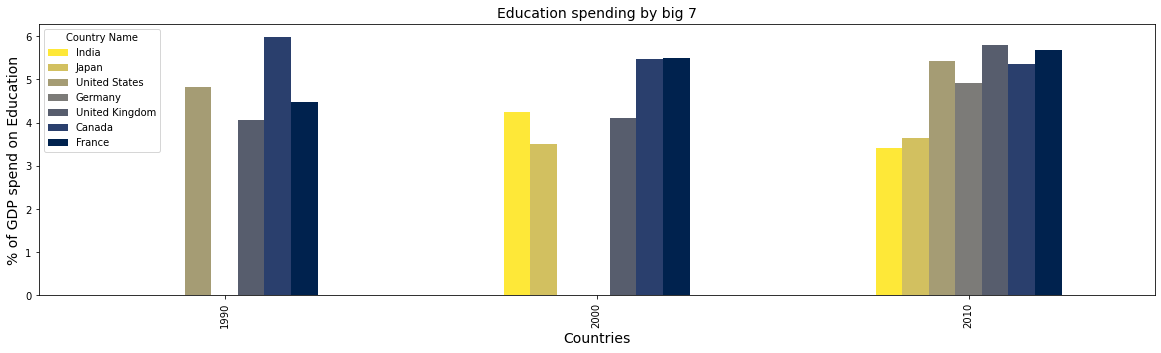

In [50]:
plt.rcParams['figure.figsize']=(20,5)
Graphk2.plot(kind='bar',colormap="cividis_r")
plt.title('Education spending by big 7',fontsize=14)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('% of GDP spend on Education',fontsize=14)
plt.show()

In [51]:
# Amount of labour force the countries have
clean_data1_1=new_data[['Country Name','Indicator Code','1990','2000','2010']]
Sorted1_2=clean_data1_1[clean_data1_1['Indicator Code']=='SL.TLF.TOTL.IN'].set_index(['Country Name'])
Sorted2=Sorted1_2.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Sorted2.drop(['Indicator Code'],axis=1,inplace=True)
Sorted3=Sorted2.transpose()
Sorted3

Country Name,India,Japan,United States,Germany,United Kingdom,Canada,France
1990,327611171.0,63873046.0,127940053.0,38880161.0,29039812.0,14716537.0,26127625.0
2000,405518817.0,67670439.0,146767633.0,40252431.0,29295735.0,16235329.0,27479571.0
2010,470609097.0,66665009.0,157021140.0,42016390.0,32010605.0,18913406.0,29861080.0


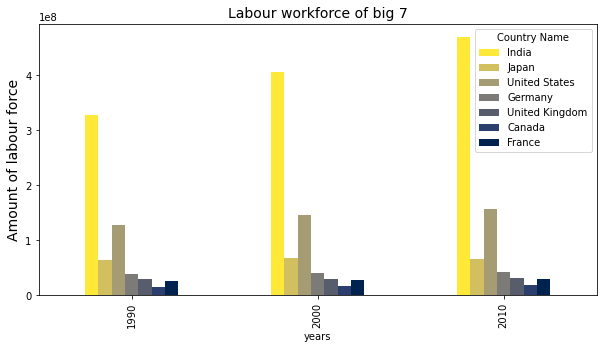

In [52]:
plt.rcParams['figure.figsize']=(10,5)
Sorted3.plot(kind='bar',colormap= "cividis_r")
plt.title('Labour workforce of big 7',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Amount of labour force',fontsize=14)
plt.show()

                    2015
Country Name            
India                NaN
Japan           515.9585
United States   496.9351
Germany         509.1041
United Kingdom  497.9719
Canada          526.6678
France          499.3061


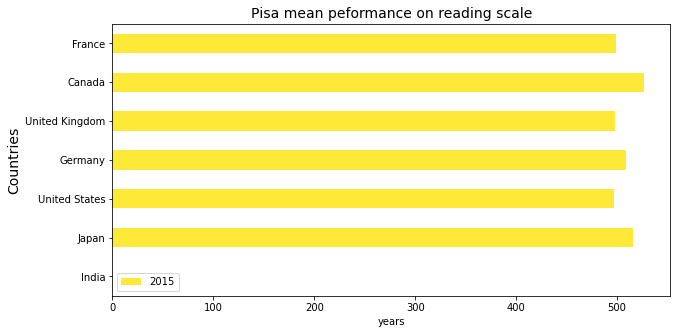

In [53]:
# learnning outcome mean peformance on reading scale
Pisa1=new_data[['Country Name','Indicator Code','2015']]
Pisa2=Pisa1[Pisa1['Indicator Code']=='LO.PISA.REA'].set_index(['Country Name'])
Pisa3=Pisa2.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Pisa3.drop(['Indicator Code'],axis=1,inplace=True)
print(Pisa3)
plt.rcParams['figure.figsize']=(10,5)
Pisa3.plot(kind='barh',colormap= "cividis_r")
plt.title('Pisa mean peformance on reading scale',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Countries',fontsize=14)
plt.show()



                    2015
Country Name            
India                NaN
Japan           532.4399
United States   469.6285
Germany         505.9713
United Kingdom  492.4785
Canada          515.6474
France          492.9204


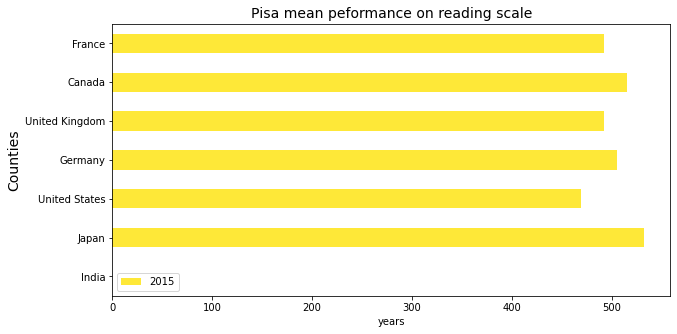

In [54]:
# learnning outcome mean peformance on mathematic scale
Pisa1M=new_data[['Country Name','Indicator Code','2015']]
Pisa2M=Pisa1M[Pisa1M['Indicator Code']=='LO.PISA.MAT'].set_index(['Country Name'])
Pisa3M=Pisa2M.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Pisa3M.drop(['Indicator Code'],axis=1,inplace=True)
print(Pisa3M)
plt.rcParams['figure.figsize']=(10,5)
Pisa3M.plot(kind='barh',colormap= "cividis_r")
plt.title('Pisa mean peformance on reading scale',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Counties',fontsize=14)
plt.show()